In [338]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

importing libraries

In [339]:
plt.rcParams["figure.figsize"] = (10,5)

increasing the figure size

In [340]:
df = pd.read_csv('data/bank.csv')

importing csv file

In [341]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [342]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [343]:
numerical=['age','balance','day','duration','campaign','pdays','previous']
categorical=['job','marital','education','default','housing','loan','contact','month','poutcome']

The Data is clean and there is no invalid values

In [344]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
target       object
dtype: object

There are 16 features and a target feature

**Exploratory Data Analysis**

1.Finding Unique Values in Each Feature

In [345]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [346]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [347]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [348]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [349]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [350]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [351]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [352]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [353]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [354]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [355]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [356]:
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [357]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [358]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [359]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [360]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [361]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

There is no outliers

2.Univariate Analysis

Categorical Features

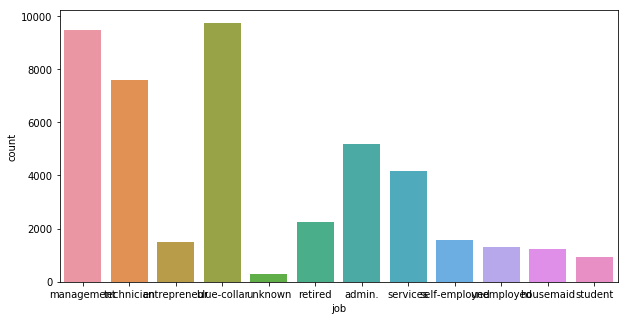

In [362]:
sns.countplot(x=df['job'], data=df)

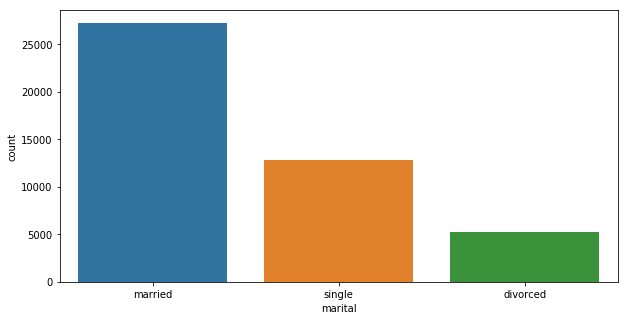

In [363]:
sns.countplot(x=df['marital'], data=df)

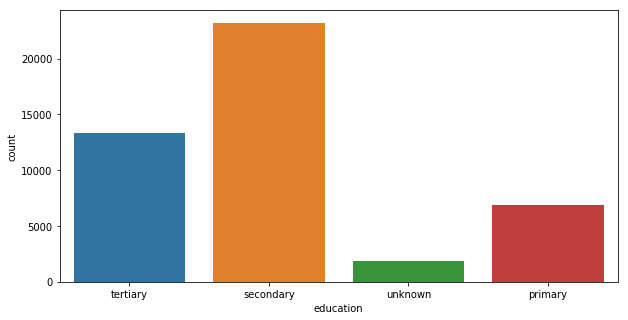

In [364]:
sns.countplot(x=df['education'], data=df)

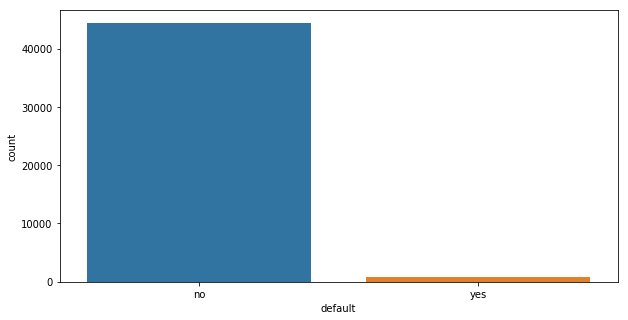

In [365]:
sns.countplot(x=df['default'], data=df)

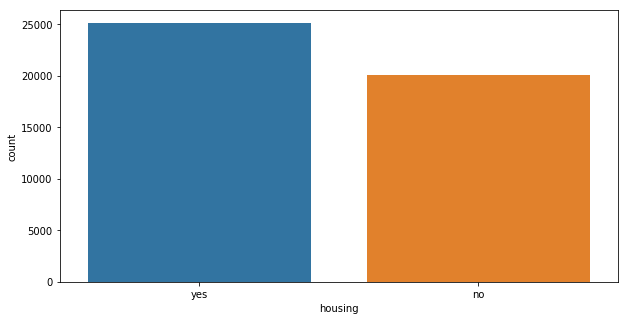

In [366]:
sns.countplot(x=df['housing'], data=df)

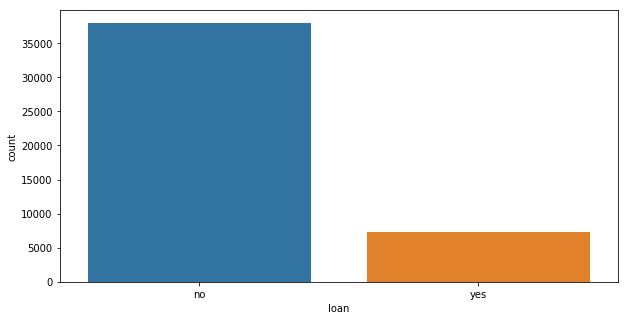

In [367]:
sns.countplot(x=df['loan'], data=df)

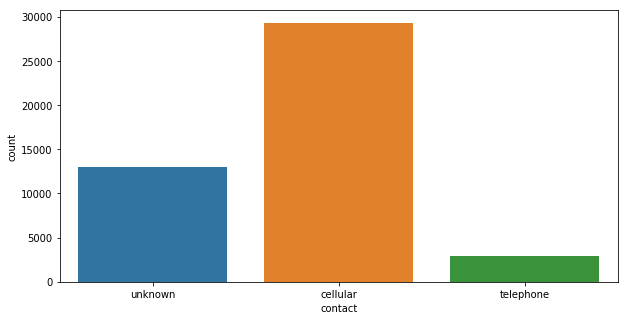

In [368]:
sns.countplot(x=df['contact'], data=df)

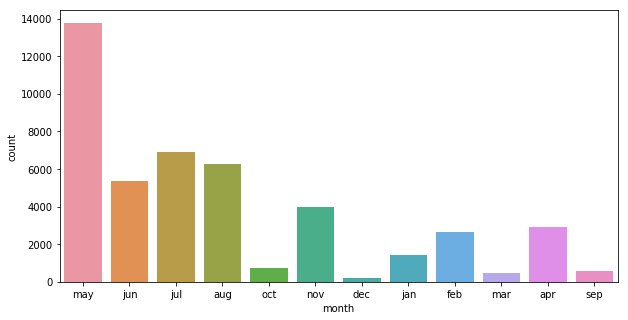

In [369]:
sns.countplot(x=df['month'], data=df)

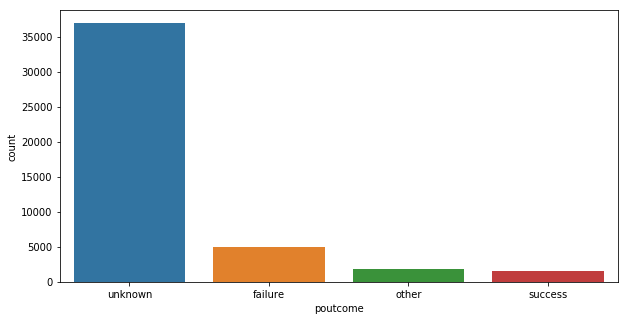

In [370]:
sns.countplot(x=df['poutcome'], data=df)

Numerical

0.6848179257252598

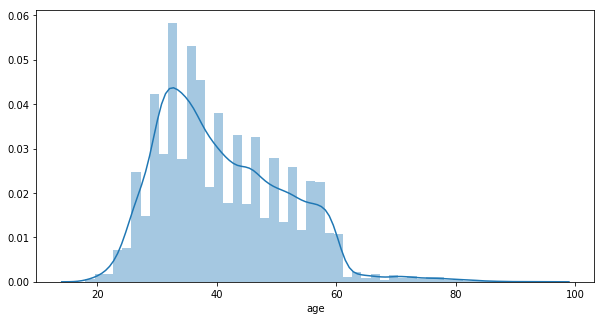

In [371]:
sns.distplot(df['age'])
df['age'].skew()

8.360308326166326

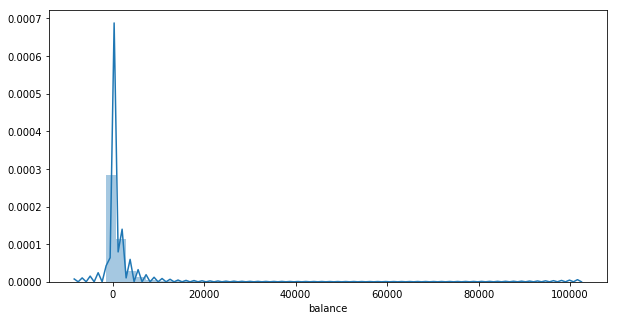

In [372]:
sns.distplot(df['balance'])
df['balance'].skew()

0.09307901402122411

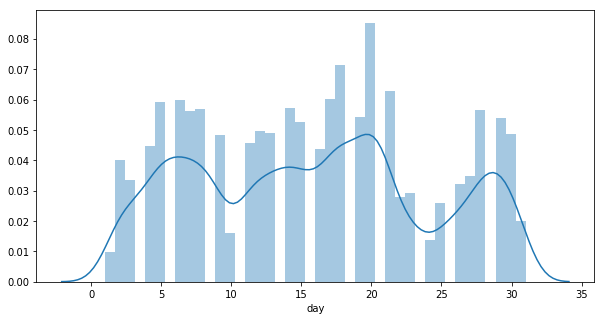

In [373]:
sns.distplot(df['day'])
df['day'].skew()

3.144318099423456

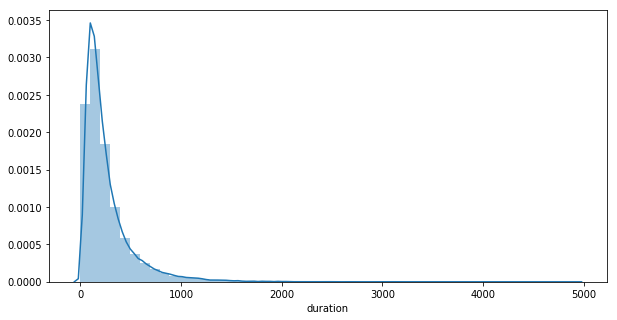

In [374]:
sns.distplot(df['duration'])
df['duration'].skew()

4.898650166179674

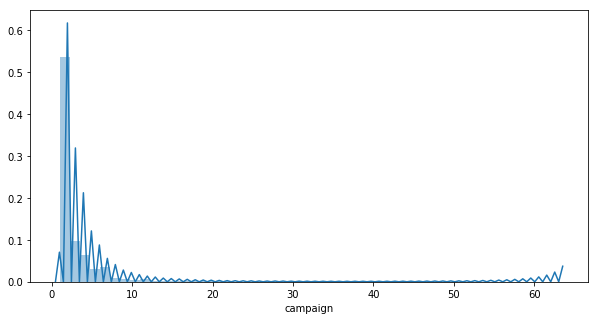

In [375]:
sns.distplot(df['campaign'])
df['campaign'].skew()

2.6157154736563477

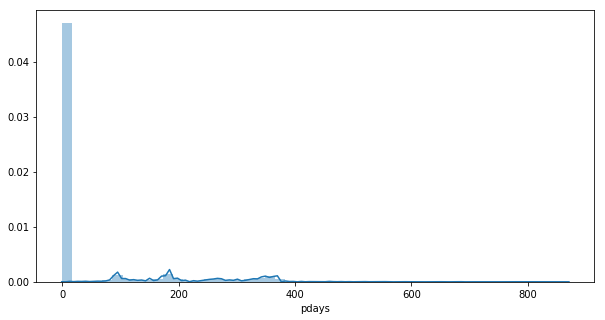

In [376]:
sns.distplot(df['pdays'])
df['pdays'].skew()

41.84645447266292

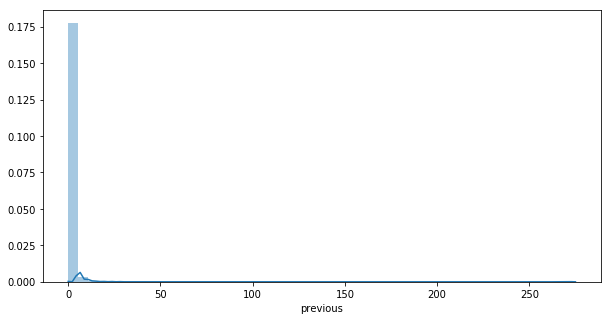

In [377]:
sns.distplot(df['previous'])
df['previous'].skew()

3.Bivariate Analysis

In [378]:
df.loc[df['target'] == 'no', 'target'] = 0

In [379]:
df.loc[df['target'] == 'yes', 'target'] = 1

Numerical Vs Target features

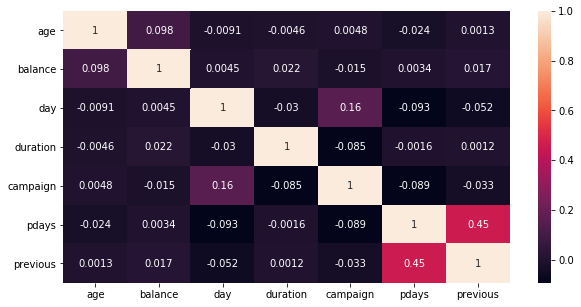

In [380]:
corr = df[numerical].corr()
sns.heatmap(corr, annot=True)

Categorical

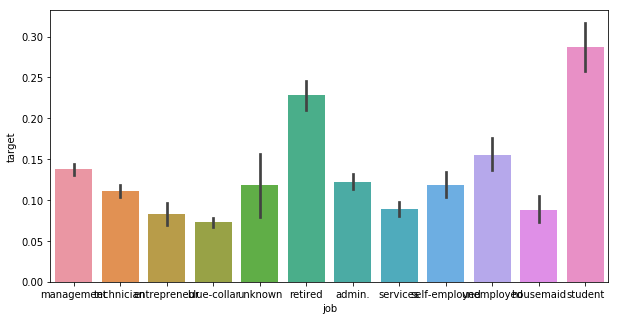

In [381]:
sns.barplot(x='job', y='target', data=df)

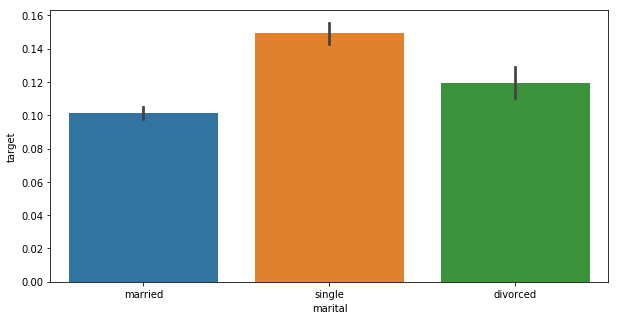

In [382]:
sns.barplot(x='marital', y='target', data=df)

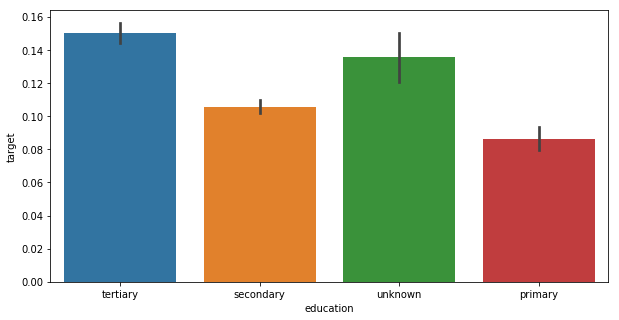

In [383]:
sns.barplot(x='education', y='target', data=df)

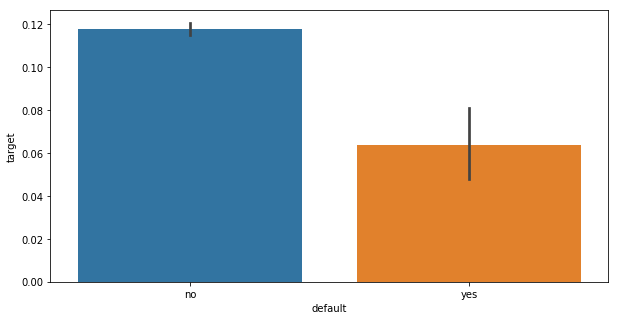

In [384]:
sns.barplot(x='default', y='target', data=df)

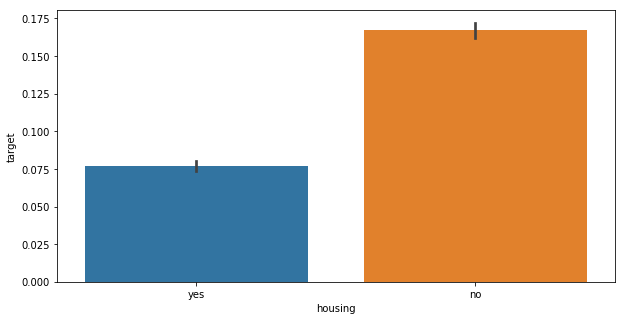

In [385]:
sns.barplot(x='housing', y='target', data=df)

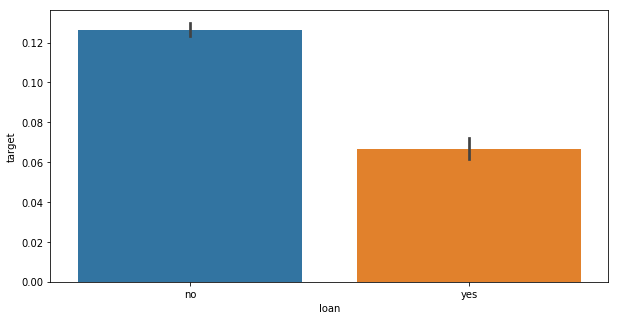

In [386]:
sns.barplot(x='loan', y='target', data=df)

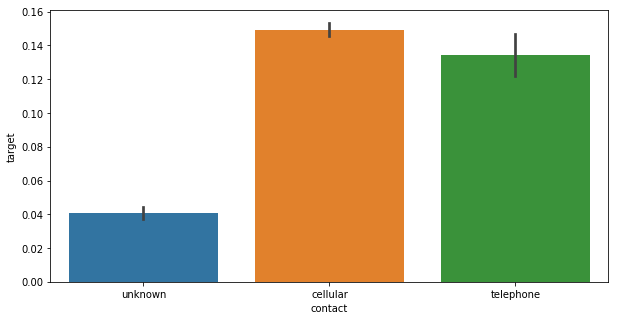

In [387]:
sns.barplot(x='contact', y='target', data=df)

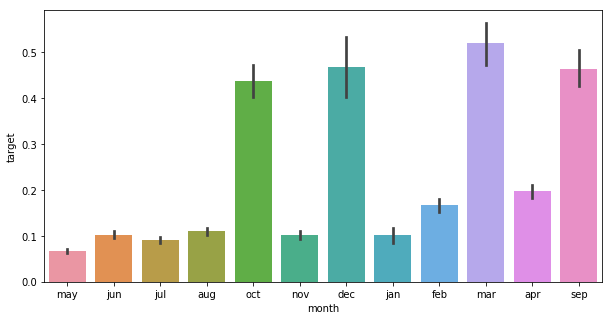

In [388]:
sns.barplot(x='month', y='target', data=df)

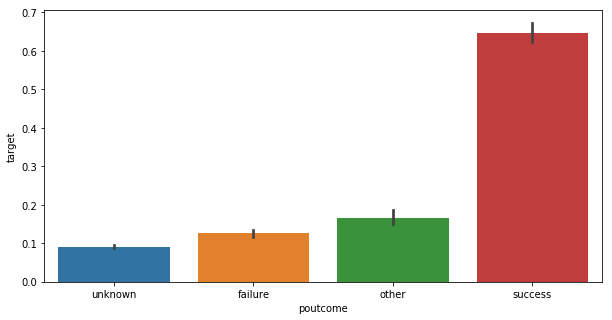

In [389]:
sns.barplot(x='poutcome', y='target', data=df)

**4.Feature Engineering**

**Data Encoding**

In [390]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [391]:
df.loc[df['job']=='management', 'job'] = 1
df.loc[df['job']=='technician', 'job'] = 2
df.loc[df['job']=='entrepreneur', 'job'] = 3
df.loc[df['job']=='blue-collar', 'job'] = 4
df.loc[df['job']=='unknown', 'job'] = 5
df.loc[df['job']=='retired', 'job'] = 6
df.loc[df['job']=='admin.', 'job'] = 7
df.loc[df['job']=='services', 'job'] = 8
df.loc[df['job']=='self-employed', 'job'] = 9
df.loc[df['job']=='unemployed', 'job'] = 10
df.loc[df['job']=='housemaid', 'job'] = 11
df.loc[df['job']=='student', 'job'] = 12

In [392]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [393]:
df.loc[df['marital']=='married', 'marital'] = 1
df.loc[df['marital']=='single', 'marital'] = 2
df.loc[df['marital']=='divorced', 'marital'] = 3

In [394]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [395]:
df.loc[df['education']=='tertiary', 'education'] = 1
df.loc[df['education']=='secondary', 'education'] = 2
df.loc[df['education']=='unknown', 'education'] = 3
df.loc[df['education']=='primary', 'education'] = 4

In [396]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [397]:
df.loc[df['default']=='no', 'default'] = 0
df.loc[df['default']=='yes', 'default'] = 1

In [398]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [399]:
df.loc[df['housing']=='no', 'housing'] = 0
df.loc[df['housing']=='yes', 'housing'] = 1

In [400]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [401]:
df.loc[df['loan']=='no', 'loan'] = 0
df.loc[df['loan']=='yes', 'loan'] = 1

In [402]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [403]:
df.loc[df['contact']=='unknown', 'contact'] = 0
df.loc[df['contact']=='cellular', 'contact'] = 1
df.loc[df['contact']=='telephone', 'contact'] = 2

In [404]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [405]:
df.loc[df['month']=='jan', 'month'] = 1
df.loc[df['month']=='feb', 'month'] = 2
df.loc[df['month']=='mar', 'month'] = 3
df.loc[df['month']=='apr', 'month'] = 4
df.loc[df['month']=='may', 'month'] = 5
df.loc[df['month']=='jun', 'month'] = 6
df.loc[df['month']=='jul', 'month'] = 7
df.loc[df['month']=='aug', 'month'] = 8
df.loc[df['month']=='sep', 'month'] = 9
df.loc[df['month']=='oct', 'month'] = 10
df.loc[df['month']=='nov', 'month'] = 11
df.loc[df['month']=='dec', 'month'] = 12

In [406]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [407]:
df.loc[df['poutcome']=='unknown', 'poutcome'] = 0
df.loc[df['poutcome']=='failure', 'poutcome'] = 1
df.loc[df['poutcome']=='other', 'poutcome'] = 2
df.loc[df['poutcome']=='success', 'poutcome'] = 3

In [408]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,1,1,1,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,2,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,3,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,4,1,3,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,5,2,3,0,1,0,0,0,5,5,198,1,-1,0,0,0


**Normalisation**

0.6848179257252598

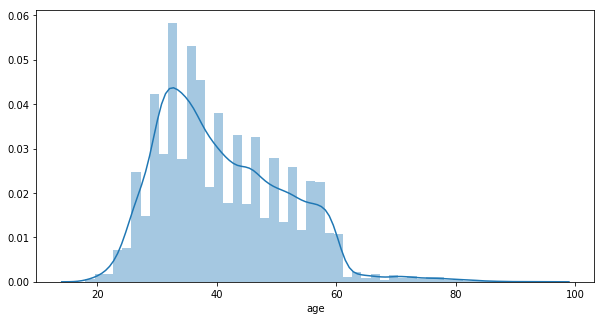

In [409]:
sns.distplot(df['age'])
df['age'].skew()

0.0989014480878478

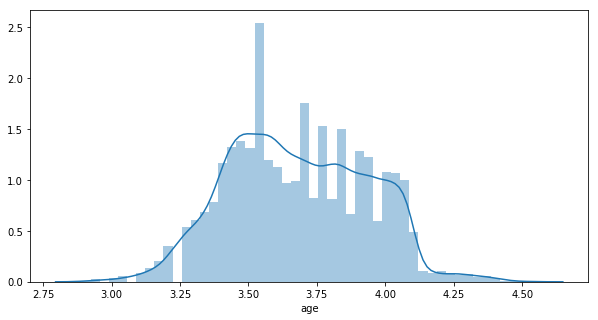

In [410]:
sns.distplot(np.log(df['age']))
np.log(df['age']).skew()

In [411]:
df['age']=np.log(df['age'])

8.360308326166326

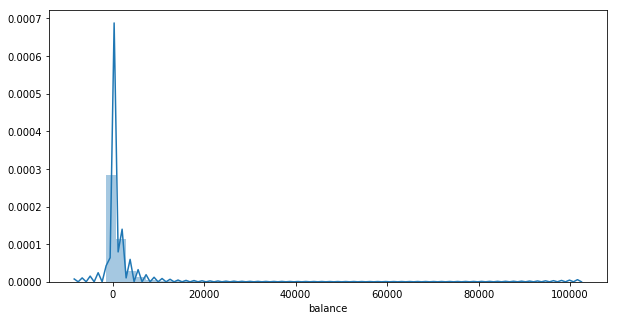

In [412]:
sns.distplot(df['balance'])
df['balance'].skew()

-0.07818749236478738

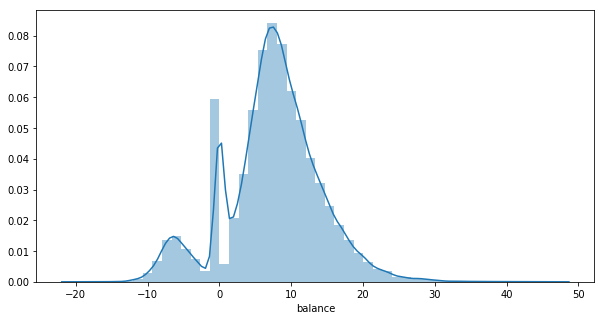

In [413]:
sns.distplot(np.cbrt(df['balance']))
np.cbrt(df['balance']).skew()

In [414]:
df['balance']=np.cbrt(df['balance'])

3.144318099423456

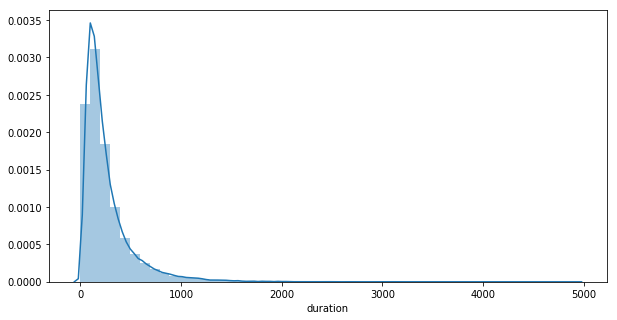

In [415]:
sns.distplot(df['duration'])
df['duration'].skew()

0.64014649967056

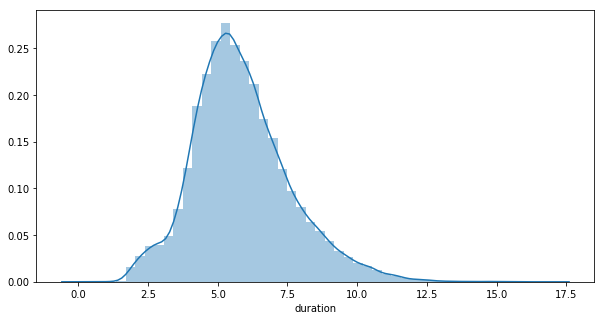

In [416]:
sns.distplot(np.cbrt(df['duration']))
np.cbrt(df['duration']).skew()

In [417]:
df['duration']=np.cbrt(df['duration'])

4.898650166179674

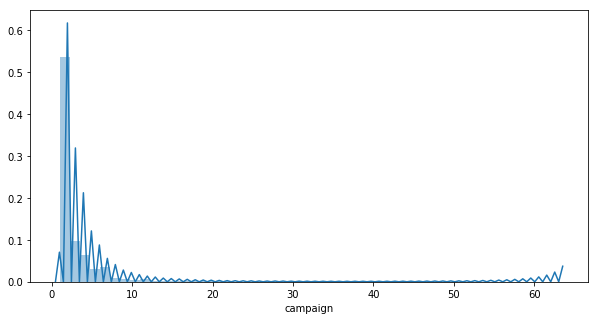

In [418]:
sns.distplot(df['campaign'])
df['campaign'].skew()

0.8802108957712975

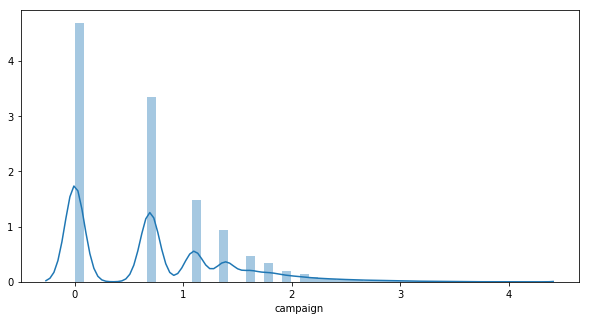

In [419]:
sns.distplot(np.log(df['campaign']))
np.log(df['campaign']).skew()

In [420]:
df['campaign']=np.log(df['campaign'])

2.6157154736563477

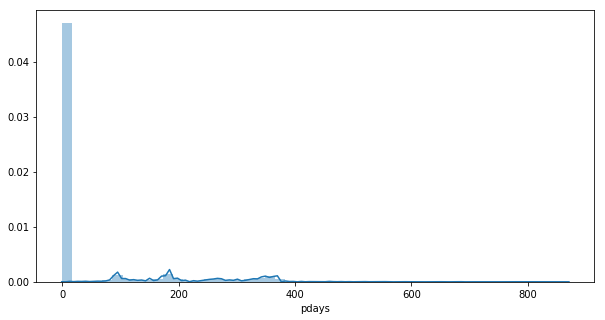

In [421]:
sns.distplot(df['pdays'])
df['pdays'].skew()

1.7618720984270984

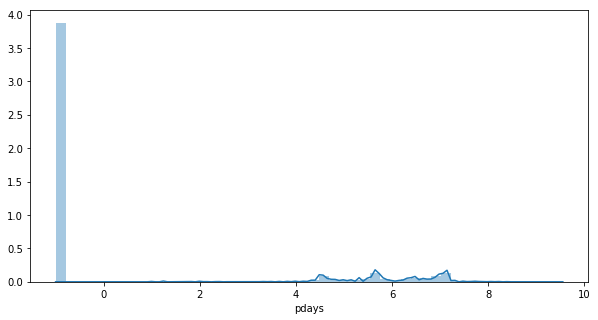

In [422]:
sns.distplot(np.cbrt(df['pdays']))
np.cbrt(df['pdays']).skew()

In [423]:
df['pdays']=np.cbrt(df['pdays'])

41.84645447266292

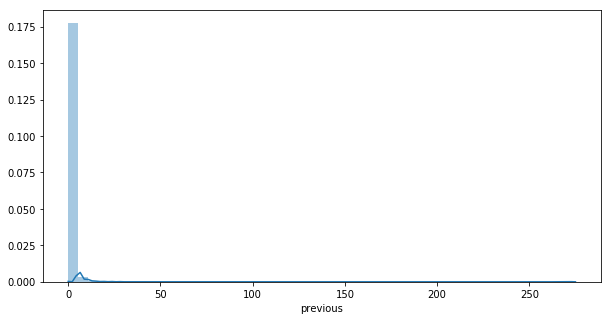

In [424]:
sns.distplot(df['previous'])
df['previous'].skew()

2.0569202267946003

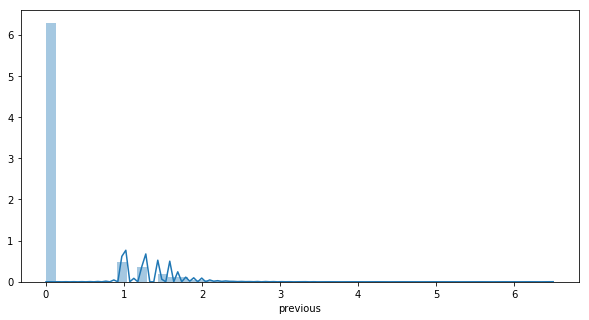

In [425]:
sns.distplot(np.cbrt(df['previous']))
np.cbrt(df['previous']).skew()

In [426]:
df['previous']=np.cbrt(df['previous'])

Skewness in data is reduced using normalization

Dropping the target value

In [427]:
targets=df['target']
df.drop(columns=['target'],inplace=True)

**Splitting test and train data**

In [428]:
from sklearn.model_selection import train_test_split
x_df, x_test, y_df, y_test = train_test_split(df,targets,test_size = 0.3)
print(x_df.shape,x_test.shape)

(31647, 16) (13564, 16)


**Logistic regression**

In [429]:
scoring='accuracy'

In [430]:
cvFolds=5

In [431]:
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
params=dict(max_iter=max_iter,C=C)

In [432]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [433]:
lr=LogisticRegression(penalty='l2')
grid=GridSearchCV(estimator=lr, param_grid=params, cv=cvFolds, n_jobs=-1, scoring=scoring)
grid_result=grid.fit(x_df,y_df)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [434]:
print("tuned hpyerparameters :(best parameters)",grid_result.best_params_)
print("accuracy :",grid_result.best_score_)

tuned hpyerparameters :(best parameters) {'C': 1.0, 'max_iter': 100}
accuracy : 0.8980946061238032


In [435]:
lr=LogisticRegression(penalty='l2',max_iter=100,dual=True,C=1.0)
lr.fit(x_df,y_df)
lr.score(x_df,y_df)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8959459032451733

Machine learns 90%

In [436]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9009141846063108

Machine predicts 90%

**Confusion matrix**

confusion matrix is the another way to predict accuracy

In [437]:
y_pred=lr.predict(x_test)

In [438]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[11751   242]
 [ 1102   469]]


True positive is 11751. True negative is 469. False positive is 242. False negative is 1102.

**RandomForest**

In [439]:
from sklearn.ensemble import RandomForestClassifier

In [440]:
clf = RandomForestClassifier(n_jobs=10, random_state=0)
clf.fit(x_df,y_df)
clf.score(x_df,y_df)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9920687584921162

Machine learns 99%

In [441]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9018726039516367

Machine predicts 90%

**Confusion Matrix for test data**

In [442]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[11641   352]
 [  979   592]]


True positive is 11641.
True negative is 592.
False positive is 352.
False negative is 979.

**Conclusion**

In logistic regression algorithm the machine learns 90% and predicts 90% of accuracy.

In RandomForestClassifier algorithm the machine learns 99% and predicts 90% of accuracy.it overfits.

Both the models gives 90% accuracy by using various prediction techniques.RandomForestClassifier is an high end algorithm for large data, so the machine learns well and predicts 90%.but,In logistic regression it is the simple algorithm but it gives a good result when compared to RandomForest.Thus, Logistic Regression works good for this Data, because of low bias and  no variance.